# Clipping

In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data',
                                    'tl_2022_us_state',
                                    'tl_2022_us_state.shp')
                                    )

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

In [4]:
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

## Prepare Alaska multipolygon

We are interested in Alaska data only

<Axes: >

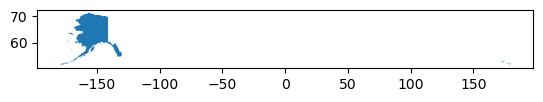

In [5]:
alaska = states[states['name'] == 'Alaska']
alaska.plot()

In [6]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected?', alaska.crs.is_projected)
alaska.crs

Is this CRS projected? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
print('CRS: ', places.crs)

places.head()

CRS:  EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<Axes: >

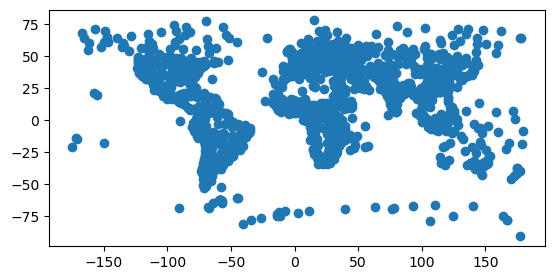

In [8]:
places.plot()

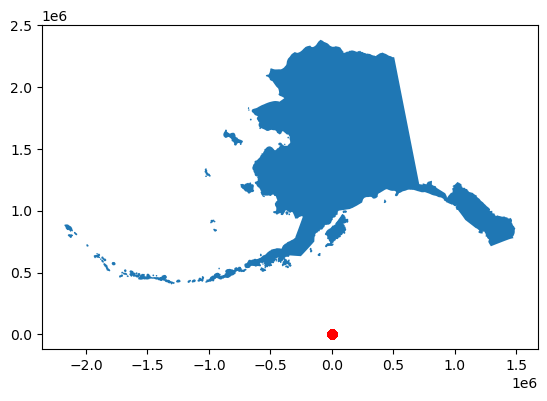

In [9]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

**Data in weird places? Check that the CRSs math.**
To plot analyze or integrate different geospatial datasets they **must have the same CRS.**

In [10]:
alaska.crs == places.crs

False

## Check-in 
Reproject the 'places' geo-dataframe into `alaska`'s CRS and verify the CRSs match using `assert`

In [11]:
places = places.to_crs(alaska.crs)
assert alaska.crs == places.crs

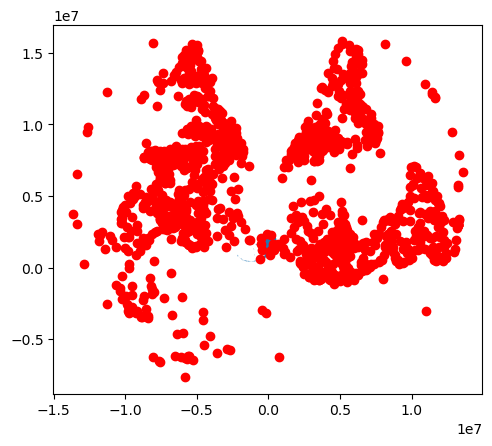

In [ ]:
# Plot points and alaska
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()


## Clipping 

**clipping** means using a polygon(s) to only select data within it. 

syntax:
```
updated_geodf = geopandas.clip(geodf, mask)
```

where: 
`updated_geodf`: intersection of the geometries in `geodf` with `mask`
-`mask` = `gpd.GeoDataframe` with the polygons you want to use for clipping 

Make sure the CRSs for the `mask` and `geodf` match.

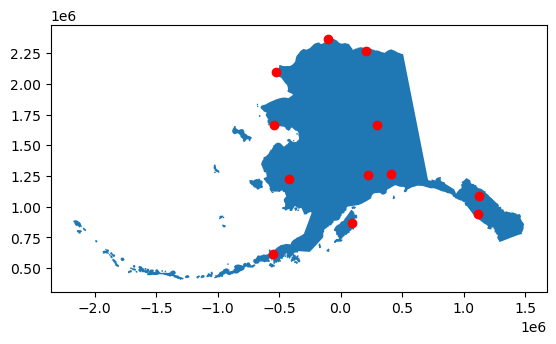

In [13]:
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax = ax)
ak_places.plot(ax = ax, color = 'red')
plt.show()

## Prepare the roads

Examine the roads dataset

In [16]:
print('CRS:', roads.crs)
roads.head()

CRS: EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,0,17,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,0,33,1,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


<Axes: >

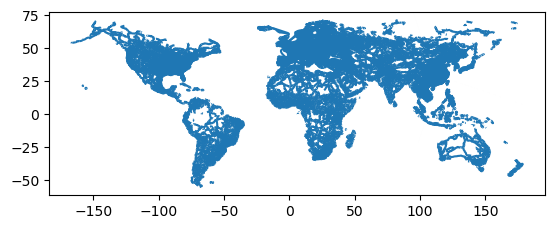

In [17]:
roads.plot()

Before jumping into reprojecting and clipping we will subset the data to select only US roads. 

Its good practice to reduce geospatial data as much as possible before applying geospatial transformations

<Axes: >

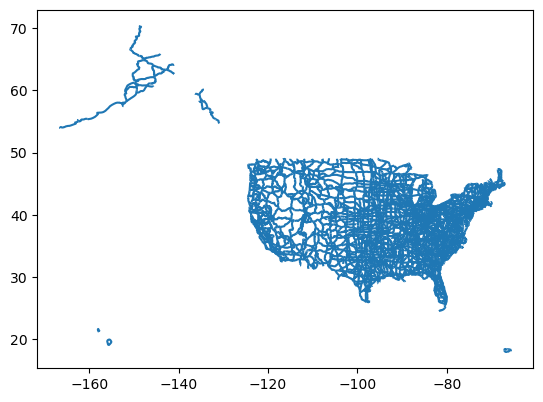

In [18]:
usa_roads = roads[roads['sov_a3'] == 'USA']
usa_roads.plot()

In [ ]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)

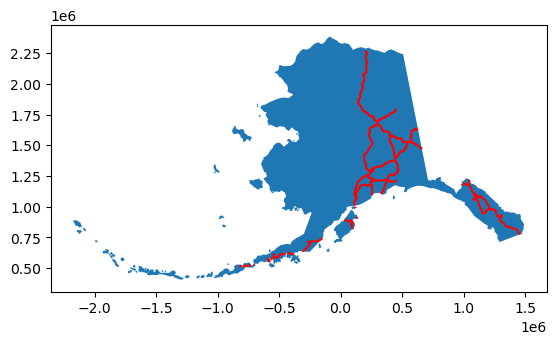

In [20]:
fig, ax = plt.subplots()
alaska.plot(ax = ax)
ak_roads.plot(ax = ax, color = 'red')
plt.show()

## Clipping wiht a bounding box

We will clip `usa_roads` geo-df with the **bounding-box** of `alaska` instead of the polygons

We will create the bounding box with `box()` function from `shapely`.

We construct the box by passing 4 numbers into `box()`:
`box(minx, miny, maxx, maxy)`

In [22]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

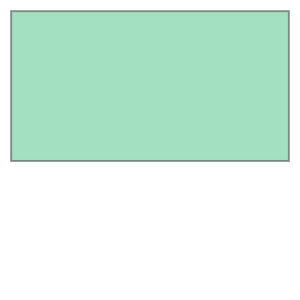

In [24]:
box(-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815)

<class 'shapely.geometry.polygon.Polygon'>


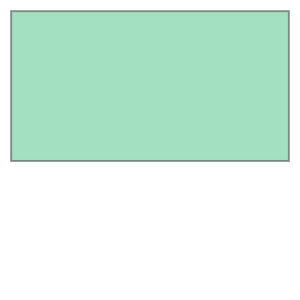

In [ ]:

bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

`*` = unpacking operator

Think about it as unpacking the elements in `alaska.total_bounds` and assigning them one-byone to the parameters `minx`, `miny`, `maxx`, `maxy` of the `box()` function

In [25]:
print(['a', 'b', 'c'])
print(*['a', 'b', 'c'])

['a', 'b', 'c']
a b c


In [ ]:
# Create a geo-dataframe from Alaska bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # Assign geometry column 
                           crs = alaska.crs) # Assign CRS

<Axes: >

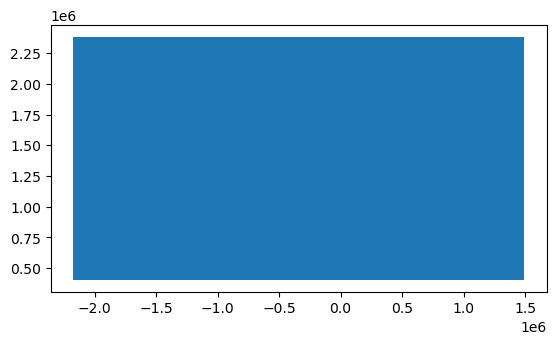

In [27]:
ak_bbox.plot()

Clip the roads using Alaska's bounding box

In [28]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

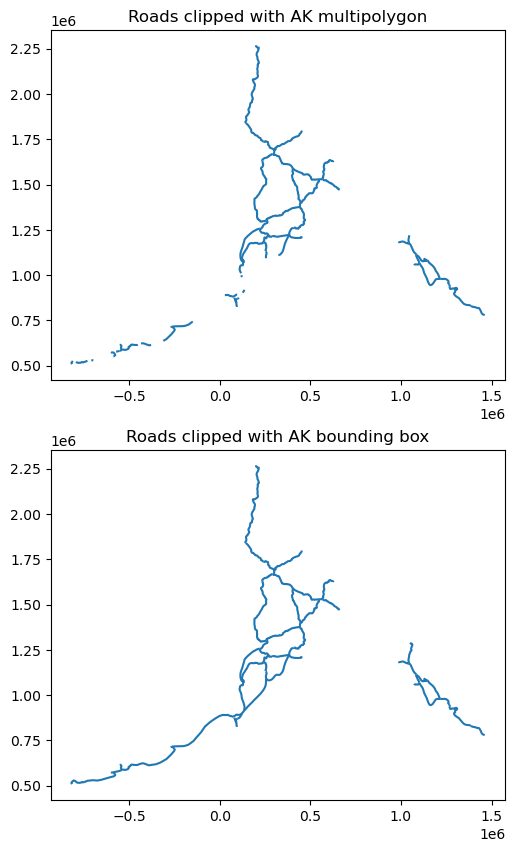

In [30]:
# Compare both clipping methods

fig, (ax1, ax2) = plt. subplots(2, 1, figsize=(10, 10))

ak_roads.plot(ax = ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax = ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

## Create map

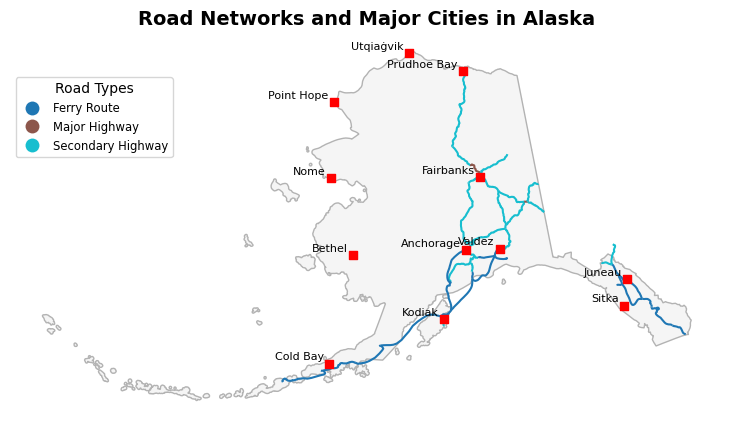

In [37]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

alaska.plot(ax = ax, color = 'whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax,
                       zorder = 1, # specify layer plotting order
                       column = 'type',
                       legend = True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'})

ak_places.plot(ax=ax,
               zorder = 2, # Specify layer plotting over
               color = 'red',
               marker='s' # Square marker 
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y + 20000, name, fontsize = 8, ha = 'right') # Moves the numbers a little off the points based on the units of the CRS

ax.set_title('Road Networks and Major Cities in Alaska', fontsize = 14, fontweight = 'bold')

plt.show()

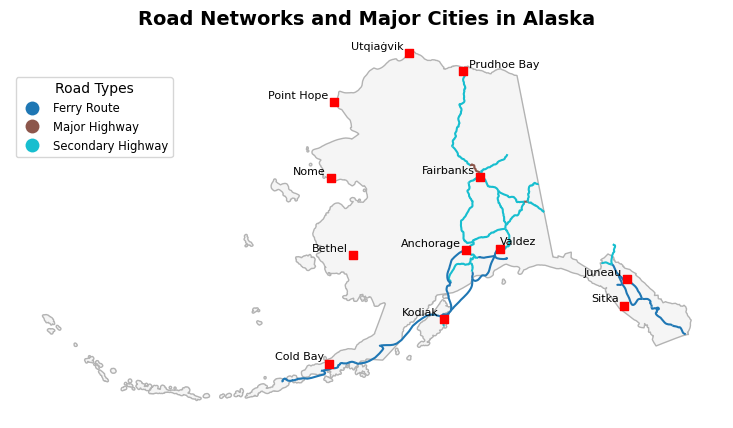

In [51]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

alaska.plot(ax = ax, color = 'whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax,
                       zorder = 1, # specify layer plotting order
                       column = 'type',
                       legend = True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'})

ak_places.plot(ax=ax,
               zorder = 2, # Specify layer plotting over
               color = 'red',
               marker='s' # Square marker 
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name == 'Valdez':
        ax.text(x, y + 20000, name, fontsize = 8, ha = "left")
    elif name == 'Prudhoe Bay':
        ax.text(x + 30000, y + 20000, name, fontsize = 8, ha = "left")
    else:
        ax.text(x-30000, y + 20000, name, fontsize = 8, ha = "right") # Moves the numbers a little off the points based on the units of the CRS

ax.set_title('Road Networks and Major Cities in Alaska', fontsize = 14, fontweight = 'bold')

plt.show()